 ## Introduction

In this Project, we'll analyze the StackOverflow developer survey 2021 dataset. The dataset contains responses to an annual survey conducted by StackOverflow. You can find the raw data & official analysis here: https://insights.stackoverflow.com/survey.



In [2]:
import os

In [3]:
os.listdir('Data anlysis')

['README_2021.txt',
 'so_survey_2021.pdf',
 'survey_results_public.csv',
 'survey_results_schema.csv']

In [4]:
import pandas as pd


In [5]:
df = pd.read_csv('Data anlysis/survey_results_public.csv')
df

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0


The dataset contains over 83,000 responses to 48 questions (although many questions are optional). The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID.

Let's view the list of columns in the data frame. 

In [6]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

It appears that shortcodes for questions have been used as column names. 

We can refer to the schema file to see the full text of each question. The schema file contains only two columns: `Column` and `QuestionText`. We can load it as Pandas Series with `Column` as the index and the  `QuestionText` as the value.

In [7]:
schema_df = pd.read_csv('Data anlysis/survey_results_schema.csv',index_col='qname')
schema_df

,qid,question,force_resp,type,selector
qname,,,,,
S0,QID16,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
MetaInfo,QID12,Browser Meta Info,False,Meta,Browser
S1,QID1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
MainBranch,QID2,Which of the following options best describes ...,True,MC,SAVR
Employment,QID24,Which of the following best describes your cur...,False,MC,MAVR
Country,QID6,"Where do you live? <span style=""font-weight: b...",True,MC,DL
US_State,QID7,<p>In which state or territory of the USA do y...,False,MC,DL
UK_Country,QID9,In which part of the United Kingdom do you liv...,False,MC,DL
S2,QID190,"<span style=""font-size:22px; font-family: aria...",False,DB,TB


In [8]:
schema_df = schema_df['question']
schema_df

qname
S0                    <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                              Browser Meta Info
S1                    <span style="font-size:22px; font-family: aria...
MainBranch            Which of the following options best describes ...
Employment            Which of the following best describes your cur...
Country               Where do you live? <span style="font-weight: b...
US_State              <p>In which state or territory of the USA do y...
UK_Country            In which part of the United Kingdom do you liv...
S2                    <span style="font-size:22px; font-family: aria...
EdLevel               Which of the following best describes the high...
Age1stCode            At what age did you write your first line of c...
LearnCode             How did you learn to code? Select all that apply.
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many ye

In [9]:
schema_df['DevType']

'Which of the following describes your current job? Please select all that apply.'

We've now loaded the dataset. We're ready to move on to the next step of preprocessing & cleaning the data for our analysis.

## Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:


In [10]:
selected_columns = [
    #Demographic
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'LearnCode',
    # Programming experience
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'PlatformHaveWorkedWith', 
    'PlatformWantToWorkWith',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'MentalHealth',
]

In [11]:
len(selected_columns)

16

Let's extract a copy of the data from these columns into a new data frame `survey_df`. We can continue to modify further without affecting the original data frame.

In [12]:
survey_df = df[selected_columns].copy()

In [13]:
selected_columns2 = [
    #Demographic
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'LearnCode',
    # Programming experience
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'Language',
    'Platform', 
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'MentalHealth',
]

In [14]:
schema = schema_df[selected_columns2]

In [15]:
survey_df.shape

(83439, 16)

In [16]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 83439 non-null  object
 1   Age                     82407 non-null  object
 2   Gender                  82286 non-null  object
 3   EdLevel                 83126 non-null  object
 4   LearnCode               82963 non-null  object
 5   Age1stCode              83243 non-null  object
 6   YearsCode               81641 non-null  object
 7   YearsCodePro            61216 non-null  object
 8   LanguageHaveWorkedWith  82357 non-null  object
 9   LanguageWantToWorkWith  76821 non-null  object
 10  PlatformHaveWorkedWith  52135 non-null  object
 11  PlatformWantToWorkWith  41619 non-null  object
 12  NEWStuck                83052 non-null  object
 13  Employment              83323 non-null  object
 14  DevType                 66484 non-null  object
 15  Me

All columns have the data type `object`, either because they contain values of different types or contain empty values (`NaN`). 

a few columns have mostly numeric values. To make our analysis easier, let's convert that columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to `NaN`.


In [17]:
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors= 'coerce')

Let's now view some basic statistics about numeric columns.

In [18]:
survey_df.describe()

,YearsCode,YearsCodePro
count,79982.000000,58467.000000
mean,12.485722,9.572511
std,9.626184,8.123225
min,1.000000,1.000000
25%,5.000000,4.000000
50%,10.000000,7.000000
75%,17.000000,13.000000
max,50.000000,50.000000


The gender column allows for picking multiple options. We'll remove values containing more than one option to simplify our analysis.

In [19]:
survey_df['Gender'].value_counts()

Man                                                                                   74817
Woman                                                                                  4120
Prefer not to say                                                                      1442
Non-binary, genderqueer, or gender non-conforming                                       690
Or, in your own words:                                                                  413
Man;Or, in your own words:                                                              268
Man;Non-binary, genderqueer, or gender non-conforming                                   252
Woman;Non-binary, genderqueer, or gender non-conforming                                 147
Man;Woman                                                                                41
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:                 21
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

In [20]:
import numpy as np
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)),np.nan, inplace=True)

In [21]:
survey_df['Gender'].value_counts()

Man                                                  74817
Woman                                                 4120
Prefer not to say                                     1442
Non-binary, genderqueer, or gender non-conforming      690
Or, in your own words:                                 413
Name: Gender, dtype: int64

We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame.

In [22]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,LearnCode,Age1stCode,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,NEWStuck,Employment,DevType,MentalHealth
2813,Canada,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",School;Friend or family member,11 - 17 years,18.0,5.0,Assembly;Bash/Shell;C;C#;C++;HTML/CSS;Java;Kot...,Assembly;C;C#;C++;HTML/CSS;Kotlin,NaN,NaN,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, mobile;Developer, front-end;Develop...",I have an anxiety disorder
40888,Israel,Under 18 years old,Man,"Secondary school (e.g. American high school, G...",School;Online Courses or Certification,11 - 17 years,NaN,NaN,NaN,NaN,NaN,NaN,Visit Stack Overflow;Google it;Play games;Panic,"Student, full-time",NaN,I have an anxiety disorder
38309,Germany,18-24 years old,Man,"Secondary school (e.g. American high school, G...","Other online resources (ex: videos, blogs, etc...",11 - 17 years,3.0,NaN,HTML/CSS;Java;JavaScript;Node.js;TypeScript,HTML/CSS;Java;JavaScript;Node.js;Python;TypeSc...,NaN,NaN,Call a coworker or friend;Visit Stack Overflow...,"Student, full-time",NaN,None of the above
40999,Denmark,18-24 years old,Man,"Associate degree (A.A., A.S., etc.)","Other online resources (ex: videos, blogs, etc...",11 - 17 years,7.0,NaN,C#;JavaScript;Node.js;SQL;TypeScript,C#;JavaScript;Rust;TypeScript,NaN,NaN,Visit Stack Overflow;Go for a walk or other ph...,"Not employed, and not looking for work",NaN,NaN
74423,United States of America,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Coding Bootcamp;School;Online Courses or Certi...,25 - 34 years,6.0,4.0,C;C++;HTML/CSS;JavaScript;Node.js;Objective-C;...,NaN,AWS;Microsoft Azure,NaN,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, mobile;Developer, full-stack",None of the above
65933,Canada,25-34 years old,Man,"Associate degree (A.A., A.S., etc.)","Other online resources (ex: videos, blogs, etc...",11 - 17 years,13.0,8.0,Java;JavaScript;Python;SQL,Python;Rust;Swift,AWS,AWS;Google Cloud Platform,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,Engineering manager,I have a concentration and/or memory disorder ...
38676,Canada,Under 18 years old,Man,"Secondary school (e.g. American high school, G...","Other online resources (ex: videos, blogs, etc...",5 - 10 years,6.0,NaN,HTML/CSS;JavaScript;Node.js;Python,Go;PHP;TypeScript,Google Cloud Platform;Heroku,NaN,Call a coworker or friend;Visit Stack Overflow...,"Student, full-time",NaN,None of the above
76322,Spain,25-34 years old,Woman,"Other doctoral degree (Ph.D., Ed.D., etc.)",School,18 - 24 years,12.0,7.0,C;C++;JavaScript;Node.js;Python;SQL,C++;Node.js;Python,NaN,NaN,Visit Stack Overflow;Google it;Watch help / tu...,Employed full-time,"Developer, full-stack;Engineer, data;Database ...",None of the above
4302,France,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",School,11 - 17 years,15.0,9.0,Python;SQL,Bash/Shell;C;Python;SQL,NaN,NaN,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Educator,None of the above
29202,India,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Coding Bootcamp;Other online resources (ex: vi...,5 - 10 years,15.0,9.0,HTML/CSS;JavaScript;Node.js;TypeScript,HTML/CSS;JavaScript;Node.js;TypeScript,AWS,AWS,Visit Stack Overflow;Google it;Watch help / tu...,Employed full-time,"Developer, mobile;Developer, front-end;Develop...",None of the above


## Exploratory Analysis and Visualization

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. 

Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [23]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Country

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [24]:
schema.Country

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [25]:
survey_df.Country.nunique()

180

We can identify the countries with the highest number of respondents using the `value_counts` method.

In [26]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States of America                                15051
India                                                   10476
Germany                                                  5568
United Kingdom of Great Britain and Northern Ireland     4447
Canada                                                   2983
France                                                   2685
Brazil                                                   2232
Poland                                                   1785
Netherlands                                              1759
Italy                                                    1659
Australia                                                1627
Spain                                                    1472
Russian Federation                                       1462
Sweden                                                   1179
Turkey                                                   1050
Name: Country, dtype: int64

We can visualize this information using a bar chart.

<AxesSubplot:title={'center':'Where do live?'}, ylabel='Country'>

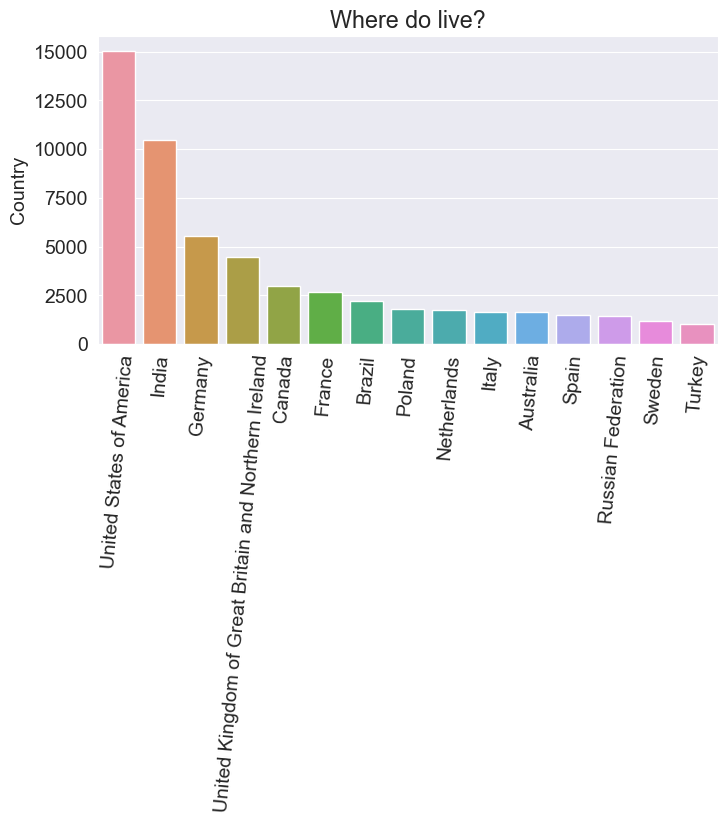

In [27]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=85)
plt.title('Where do live?')
sns.barplot(x=top_countries.index,y=top_countries)

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations.

### Age

The distribution of respondents' age is another crucial factor to look at. We can use a countplot to visualize it. 

In [28]:
survey_df.Age.value_counts()

25-34 years old       32269
18-24 years old       20761
35-44 years old       15081
45-54 years old        5433
Under 18 years old     5283
55-64 years old        1800
Prefer not to say       564
65 years or older       414
Name: Age, dtype: int64

In [29]:
survey_df.where(~(survey_df.Age.str.contains('Prefer not to say', na=False)), np.nan, inplace=True)

<Figure size 800x600 with 0 Axes>

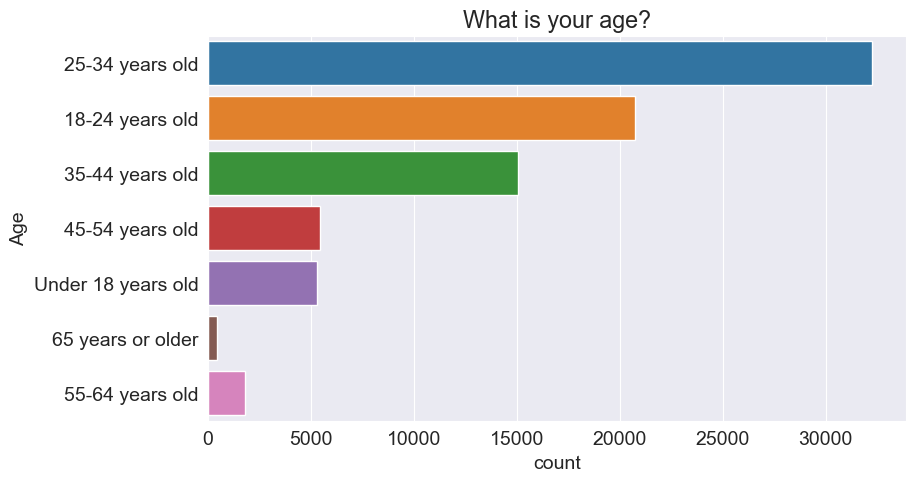

<Figure size 800x600 with 0 Axes>

In [30]:
sns.countplot(y=survey_df.Age)
plt.title(schema.Age)
plt.figure(figsize=(8,6))

### Gender

Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [31]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply.'

In [32]:
survey_df.Gender.value_counts()


Man                                                  74602
Woman                                                 4106
Prefer not to say                                     1168
Non-binary, genderqueer, or gender non-conforming      682
Or, in your own words:                                 385
Name: Gender, dtype: int64

Here we need to remove Prefer not to say and Or, in your own words:

In [33]:
survey_df.where(~(survey_df.Gender.str.contains('Or, in your own words:', na=False)), np.nan, inplace=True)

In [36]:
survey_df.where(~(survey_df.Gender.str.contains('Prefer not to say', na=False)), np.nan, inplace=True)

In [37]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  74602
Woman                                                 4106
Non-binary, genderqueer, or gender non-conforming      682
Name: Gender, dtype: int64

A pie chart would be a great way to visualize the distribution.

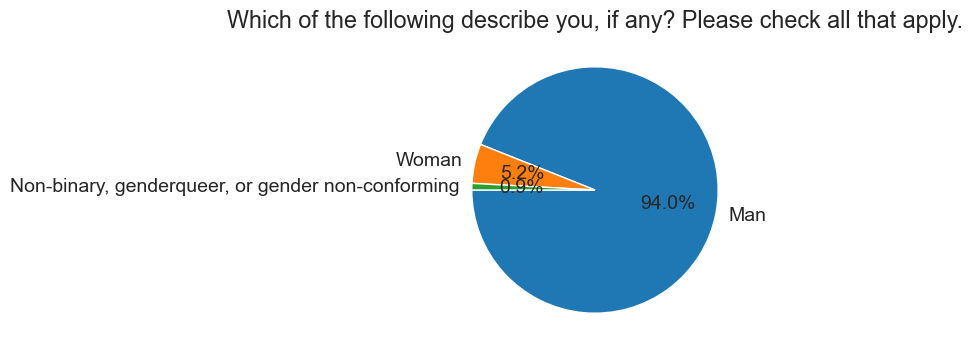

In [38]:
plt.figure(figsize=(8,4))
plt.title(schema.Gender)
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%', startangle=180);

Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%.

### Education Level

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

In [35]:
survey_df.EdLevel.unique()

array(['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', nan,
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)'],
      dtype=object)

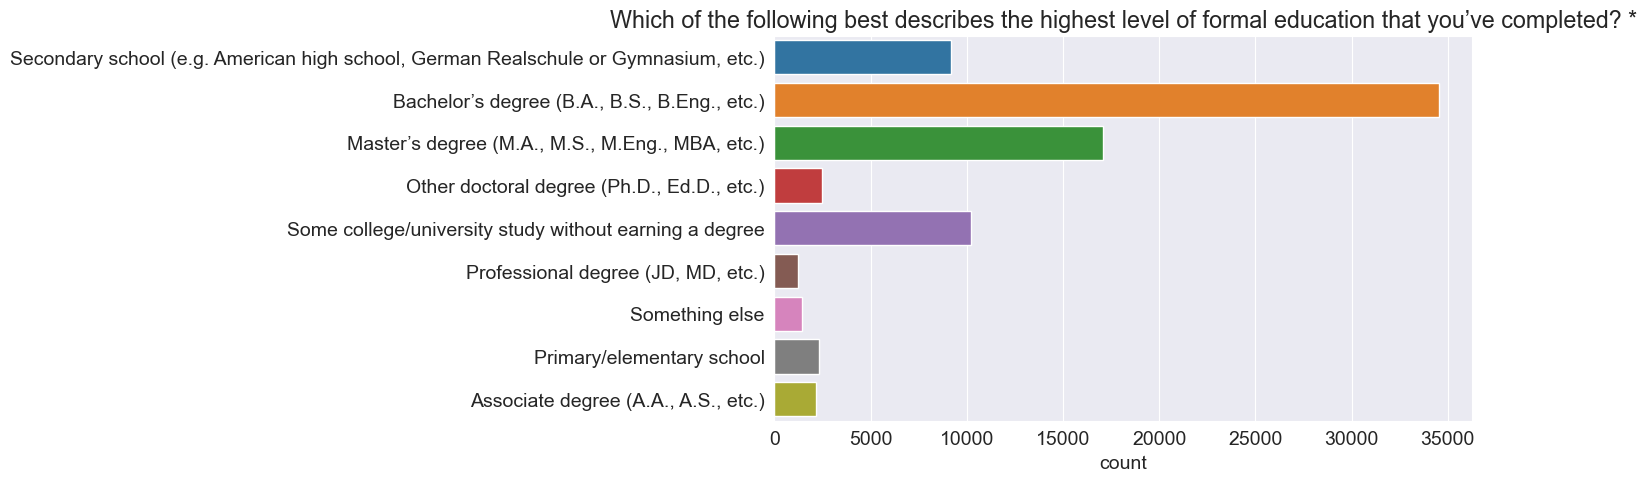

In [36]:
sns.countplot(y=survey_df.EdLevel)
plt.title(schema.EdLevel)
plt.ylabel(None);

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

### Employment

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the `Employment` column.

In [37]:
schema.Employment

'Which of the following best describes your current <b>employment status</b>?'

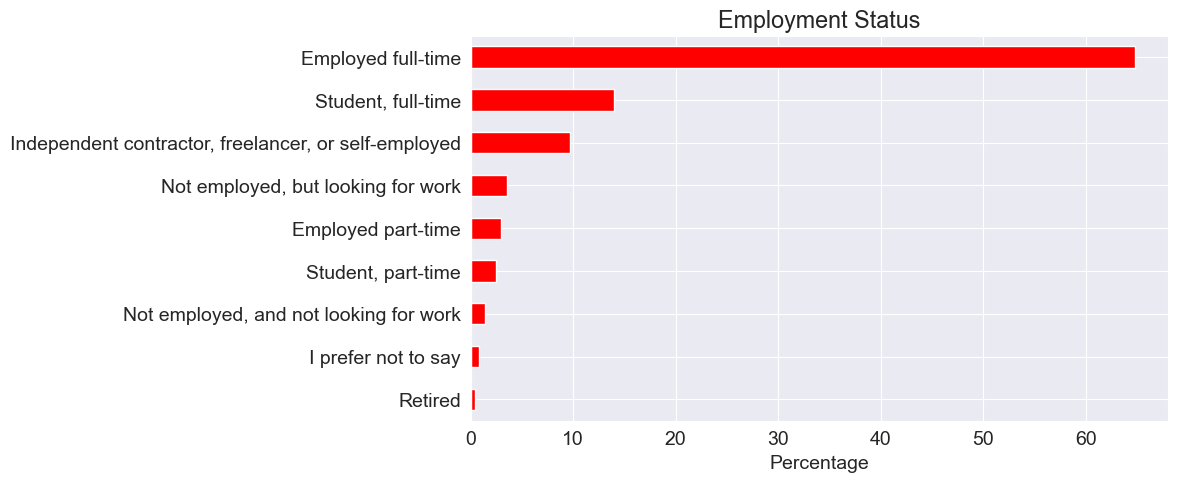

In [38]:
(survey_df.Employment.value_counts(normalize=True,ascending=True)*100).plot(kind='barh',color='r')
plt.title('Employment Status')
plt.xlabel('Percentage');

### DevType

The `DevType` field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon `;`, making it a bit harder to analyze directly.

In [39]:
schema.DevType

'Which of the following describes your current job? Please select all that apply.'

Let's define a helper function that turns a column containing lists of values (like survey_df.DevType) into a data frame with one column for each possible option.

In [40]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [41]:
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

,"Developer, mobile","Developer, front-end","Developer, desktop or enterprise applications","Developer, full-stack","Engineer, data",Other (please specify):,Data scientist or machine learning specialist,"Developer, back-end",Academic researcher,Database administrator,...,DevOps specialist,Data or business analyst,Designer,Engineering manager,"Engineer, site reliability",System administrator,Product manager,"Senior Executive (C-Suite, VP, etc.)",Educator,Marketing or sales professional
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
83435,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83436,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
83437,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


The `dev_type_df` has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is `True`. Otherwise, it is `False`.

We can now use the column-wise totals to identify the most common roles.


In [42]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, full-stack                            32182
Developer, back-end                              28402
Developer, front-end                             17816
Developer, desktop or enterprise applications    10753
Developer, mobile                                 9597
DevOps specialist                                 6855
System administrator                              5863
Database administrator                            5506
Designer                                          4452
Developer, embedded applications or devices       4451
Data scientist or machine learning specialist     4150
Student                                           4055
Engineer, data                                    4048
Engineering manager                               3723
Data or business analyst                          3680
Developer, QA or test                             3489
Other (please specify):                           3393
Product manager                                   2977
Academic r

Text(0.5, 0, 'Count')

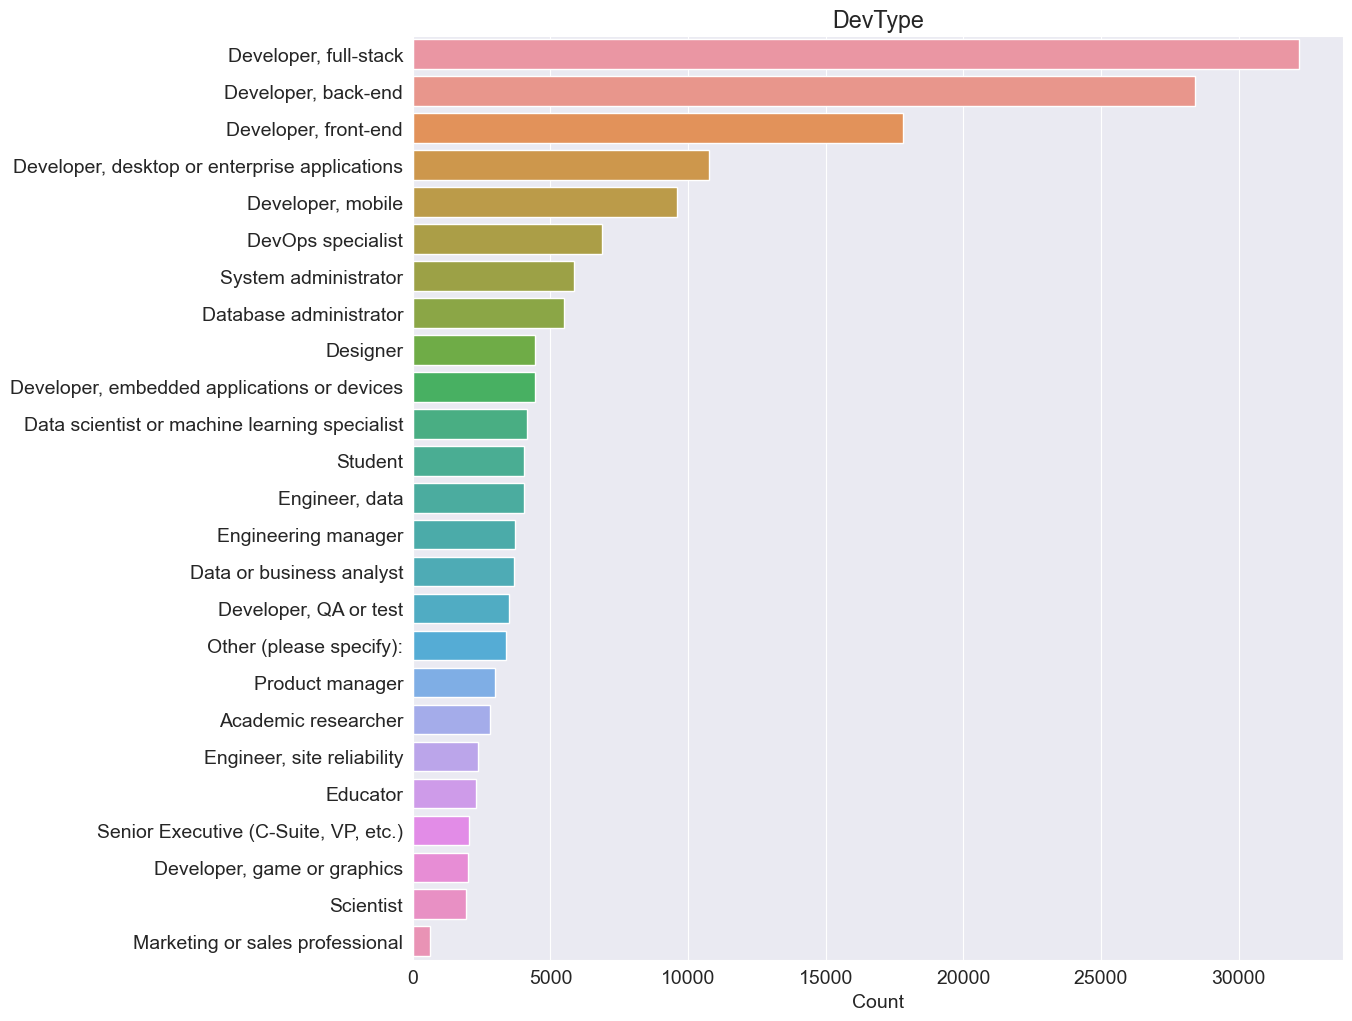

In [43]:
plt.figure(figsize=(12,12))
sns.barplot( x = dev_type_totals, y=dev_type_totals.index )
plt.title('DevType')
plt.xlabel('Count')

## Asking and Answering Questions

We've already gained several insights about the respondents and the programming community by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

#### Q: What are the most popular programming languages in 2021? 

To answer, this we can use the `LanguageWorkedWith` column. Similar to `DevType`, respondents were allowed to choose multiple options here.

In [44]:
survey_df.LanguageHaveWorkedWith

0        C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift
1                                    JavaScript;Python
2                             Assembly;C;Python;R;Rust
3                                JavaScript;TypeScript
4                       Bash/Shell;HTML/CSS;Python;SQL
                             ...                      
83434                               Clojure;Kotlin;SQL
83435                                              NaN
83436                               Groovy;Java;Python
83437             Bash/Shell;JavaScript;Node.js;Python
83438           Delphi;Elixir;HTML/CSS;Java;JavaScript
Name: LanguageHaveWorkedWith, Length: 83439, dtype: object

First, we'll split this column into a data frame containing a column of each language listed in the options.

In [45]:
languages_worked_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)

In [46]:
languages_worked_df

,C++,HTML/CSS,JavaScript,Objective-C,PHP,Swift,Python,Assembly,C,R,...,VBA,Clojure,APL,LISP,F#,Groovy,Elixir,Erlang,Crystal,COBOL
0,True,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
83435,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83436,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
83437,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It appears that a total of 38 languages were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.


In [47]:
language_worked_percentage = languages_worked_df.mean().sort_values(ascending=False) *100
language_worked_percentage

JavaScript     62.431237
HTML/CSS       53.788996
Python         46.093553
SQL            45.331320
Java           33.915795
Node.js        32.572298
TypeScript     29.108690
C#             26.747684
Bash/Shell     25.787701
C++            23.149846
PHP            21.116025
C              19.948705
PowerShell     10.244610
Go              9.149199
Kotlin          8.001055
Rust            6.609619
Ruby            6.445427
Dart            5.821019
Assembly        5.272115
Swift           4.882609
R               4.834670
Matlab          4.455950
VBA             4.453553
Groovy          2.873956
Objective-C     2.663023
Scala           2.480854
Perl            2.293891
Delphi          2.003859
Haskell         1.984683
Clojure         1.770155
Elixir          1.638323
LISP            1.221251
Julia           1.208068
F#              0.904853
Erlang          0.715493
APL             0.560889
Crystal         0.528530
COBOL           0.481789
dtype: float64

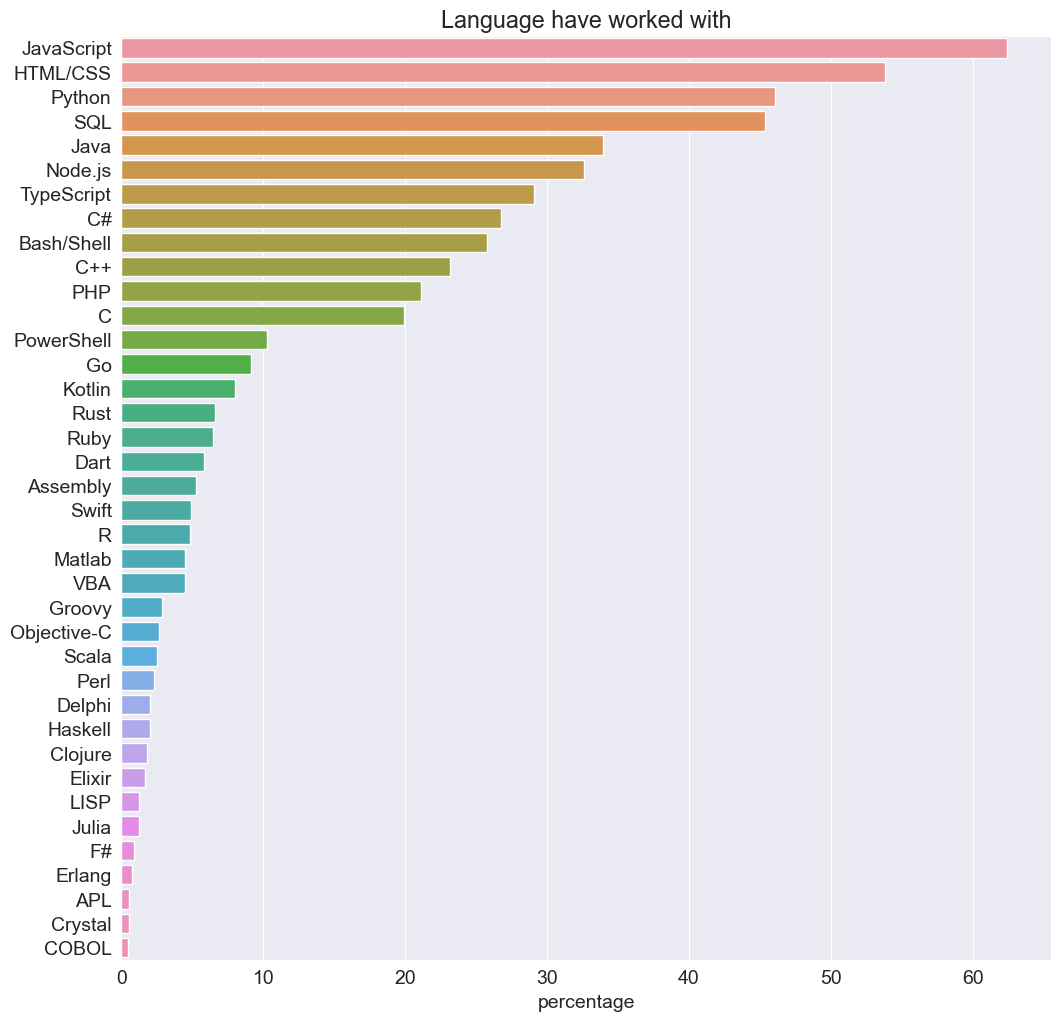

In [48]:
plt.figure(figsize=(12,12))
sns.barplot(x=language_worked_percentage ,y = language_worked_percentage.index)
plt.xlabel('percentage')
plt.title('Language have worked with');

#### Q: Which languages are the most people interested to learn over the next year?

For this, we can use the `LanguageDesireNextYear` column, with similar processing as the previous one.

In [49]:
language_intrested_df = split_multicolumn(survey_df.LanguageWantToWorkWith)


In [50]:
language_intrested_percentage = language_intrested_df.mean().sort_values(ascending=False) *100
language_intrested_percentage

JavaScript     43.186040
Python         40.582941
HTML/CSS       34.166277
TypeScript     31.497261
SQL            31.084984
Node.js        28.195448
C#             20.954230
Java           20.007431
Go             18.443414
Rust           18.366711
C++            17.563729
Bash/Shell     16.157912
Kotlin         12.462997
C              11.063172
PHP            10.287755
Dart            8.227567
Swift           7.391028
Ruby            5.732331
PowerShell      5.661621
R               4.644111
Assembly        4.005321
Haskell         3.933412
Elixir          3.908244
Scala           3.690121
Julia           2.824818
Clojure         2.794856
F#              2.488045
Matlab          1.788133
LISP            1.701842
Objective-C     1.604765
Erlang          1.572406
Groovy          1.360275
Perl            1.320725
VBA             1.230839
Delphi          1.122976
Crystal         0.906051
APL             0.614820
COBOL           0.342765
dtype: float64

Text(0.5, 0, 'Percentage')

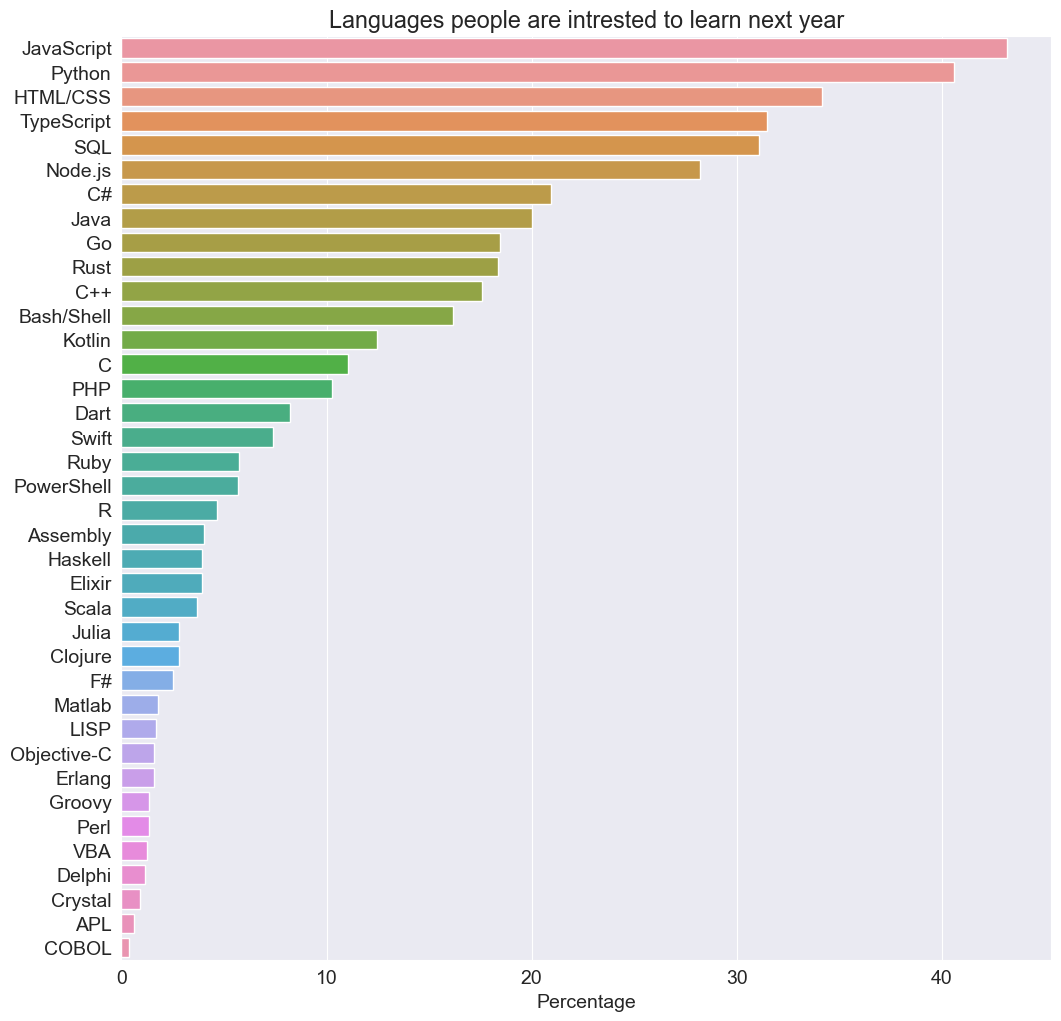

In [51]:
plt.figure(figsize=(12,12))
sns.barplot(x=language_intrested_percentage, y = language_intrested_percentage.index)
plt.title('Languages people are intrested to learn next year')
plt.xlabel('Percentage')

#### Q: which platform are the most people intrested to learn over the next year ?

For this, we can use `PlatformHaveWorkedWith` colums

In [52]:
platform_df = split_multicolumn(survey_df.PlatformHaveWorkedWith)

In [53]:
platform_total = platform_df.sum().sort_values(ascending=False)
platform_total

AWS                            28408
Google Cloud Platform          16220
Microsoft Azure                16129
Heroku                         12522
DigitalOcean                    9211
IBM Cloud or Watson             1306
Oracle Cloud Infrastructure      945
dtype: int64

Text(0.5, 0, 'count')

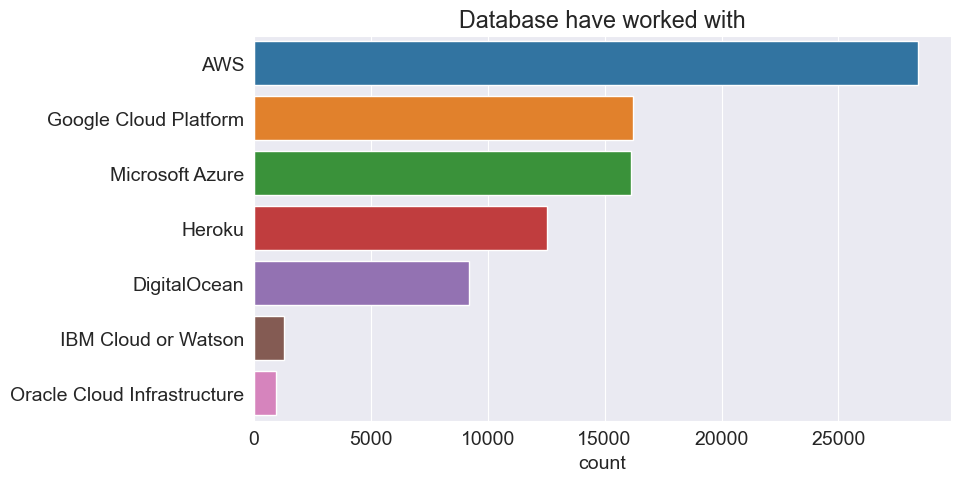

In [54]:
sns.barplot(y=platform_total.index, x= platform_total)
plt.title('Database have worked with')
plt.xlabel('count')


In [65]:
schema.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project) '

#### Q:  Most of the time, which age group has written their first line of code or program?

Text(0.5, 1.0, 'At what age did you write your first line of code or program?')

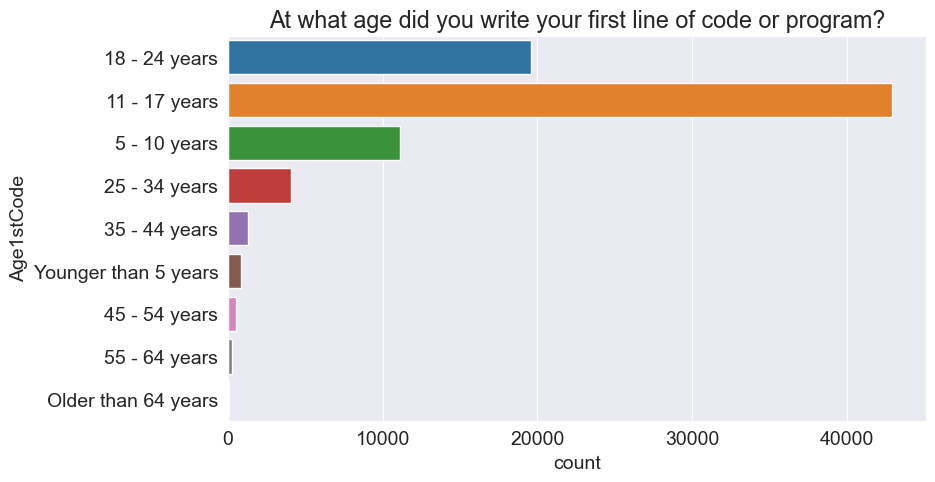

In [66]:
sns.countplot(y=survey_df.Age1stCode)
plt.title('At what age did you write your first line of code or program?')

#### Q: How most people learn to code

for this we can use `LearnCode` columns

In [72]:
schema.LearnCode

'How did you learn to code? Select all that apply.'

In [77]:
learn_code_df = split_multicolumn(survey_df.LearnCode)
learn_code_percentage = learn_code_df.mean().sort_values(ascending=False) * 100
learn_code_percentage

Other online resources (ex: videos, blogs, etc)    57.446758
School                                             51.864236
Books / Physical media                             49.735735
Online Courses or Certification                    39.126787
Online Forum                                       30.413835
Friend or family member                            17.519385
Colleague                                          16.614533
Coding Bootcamp                                     9.855104
Other (please specify):                             7.877611
dtype: float64

Text(0.5, 1.0, 'how most peoples learn to code')

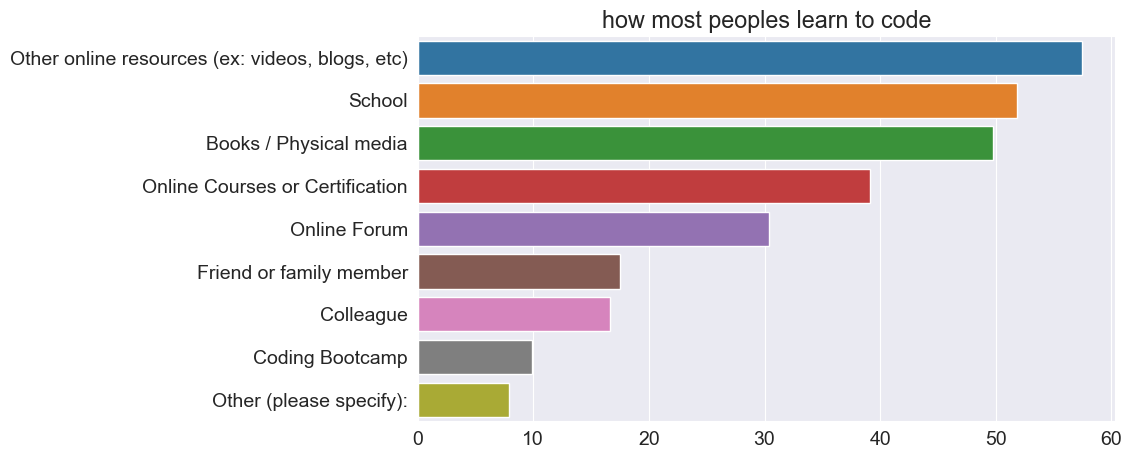

In [76]:
sns.barplot(x = learn_code_percentage, y= learn_code_percentage.index)
plt.title('how most peoples learn to code')


It is no surprise that almost 60% of respondents learned how to code from online resources. 